# A connection for the $(RG,GB)=(-1,-1)$ representation of $T_4$

This notebook computes and visualizes a reasonable connection (i.e. vector potential) for said representation.

In [1]:
# setup

var('c, x, y, z, t, theta, phi')
assume(x,'real')
assume(y,'real')
assume(theta,'real')
assume(phi,'real')
assume(z,'complex')
assume(c,'complex')

In [2]:
# more setup, to find the 3-coincidence points in S^2, our reduced configuration space.

u = vector([1,1,1,1])


v1 = vector([1,0,0,0])
v2 = vector([0,1,0,0])
v3 = vector([0,0,1,0])

v1 = v1 - (v1*u)*u/u.norm()^2
v2 = v2 - (v2*u)*u/u.norm()^2
v3 = v3 - (v3*u)*u/u.norm()^2

v2 = v2 - (v2*v1)*v1/v1.norm()^2
v3 = v3 - (v3*v1)*v1/v1.norm()^2

v3 = v3 - (v3*v2)*v2/v2.norm()^2

u = u/u.norm()
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v3 = v3/v3.norm()

M1 = matrix([[1,-1,0,0],[0,1,-1,0]])
M2 = matrix([[1,-1,0,0],[0,1,0,-1]])
M3 = matrix([[1,0,-1,0],[0,0,1,-1]])
M4 = matrix([[0,1,-1,0],[0,0,1,-1]])

Pl = matrix([v1,v2,v3]).transpose()

N1 = M1*Pl
N2 = M2*Pl
N3 = M3*Pl
N4 = M4*Pl

w1 = N1.right_kernel().basis_matrix()[0]
w2 = N2.right_kernel().basis_matrix()[0]
w3 = N3.right_kernel().basis_matrix()[0]
w4 = N4.right_kernel().basis_matrix()[0]

w1 = (w1/w1.norm()).simplify_full()
w2 = (w2/w2.norm()).simplify_full()
w3 = (w3/w3.norm()).simplify_full()
w4 = (w4/w4.norm()).simplify_full()

In [3]:
# helper functions

def vec_to_complex(v):
    return v[0]+i*v[1]

def complex_to_vector(c):
    return vector([c.real(),c.imag()])

def make_vector_field(func,x,y):
    return complex_to_vector(func(z=x+sqrt(-1)*y))

def make_bounded_vf(vf, scale):
    scale_factor = max_symbolic(scale, vf.norm())
    return vf*scale/scale_factor


This identifies $w_4$ with the point at infinity and $-w_4$ with zero.

In [4]:
#def stereographic_proj(v):
#    """ Standard Stereographic projection onto plane normal to z-axis"""
#    return (v[0]/(1-v[2]),v[1]/(1-v[2]))
#
#def un_stereographic_proj(v):
#    """ inverse of Standard Stereographic projection onto plane normal to z-axis"""
#    norm_squared = v[0]^2+v[1]^2
#    return vector([2*v[0]/(1+norm_squared),2*v[1]/(1+norm_squared),(-1+norm_squared)/(1+norm_squared)])

def stereographic_proj(v):
    """ Standard Stereographic projection onto plane normal to x-axis """
    return vector((v[1]/(1-v[0]),v[2]/(1-v[0])))

def un_stereographic_proj(v):
    """ inverse of Standard Stereographic projection onto plane normal to x-axis """
    norm_squared = v[0]^2+v[1]^2
    return vector([(-1+norm_squared)/(1+norm_squared),2*v[0]/(1+norm_squared),2*v[1]/(1+norm_squared)])

def un_stero_proj_vect(v):
    """ pushes vector field from plane to sphere with coordinates (theta, phi) 
        where 
        *** theta is angle of declination from the x-axis and
        *** phi is the ccw angle from the y-axis in the yz-plane  """
    M = matrix([[4*x, 4*y], [2*(-x^2+y^2+1), -4*x*y], [-4*x*y,2*(x^2-y^2+1)]])/(x^2+y^2+1)
    return (M*v)( x=sin(theta)*cos(phi)/(1-cos(theta)), y=sin(theta)*sin(phi)/(1-cos(theta)) )

In [5]:
def make_pole_vf(c):
    cx = c.real()
    cy = c.imag()
    return vector([-(y-cy)/( (x-cx)^2 + (y-cy)^2 ),
                    (x-cx)/( (x-cx)^2 + (y-cy)^2 )  ])

In [6]:
bg_pts = [vec_to_complex(stereographic_proj( w1)),
          vec_to_complex(stereographic_proj( w2)),
          vec_to_complex(stereographic_proj( w3)),
          vec_to_complex(stereographic_proj(-w4))]

for cx in bg_pts:
    pretty_print(cx)

rg_pts = [vec_to_complex(stereographic_proj(-w1)),
          vec_to_complex(stereographic_proj(-w2)),
          vec_to_complex(stereographic_proj(-w3)) ] 
        #, vec_to_complex(stereographic_proj( w4)) = infinity

1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)

-1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)

-sqrt(2)

0

## Now we verify that the connection that we describe is closed

Well, modulo the dirac delta points anyway. Also that it is co-closed. Well, when centered at 0.

In [7]:
assume(x,'real')
assume(y,'real')

vf_connection = make_pole_vf(c)
#vf_connection = make_vector_field(connection,x,y).simplify_full()
pretty_print("vector potential: ", vf_connection)

F_conn = diff(vf_connection[1], x) - diff(vf_connection[0], y)
F_conn = F_conn.simplify_full()
pretty_print("field: ",F_conn)

# euclidean codifferential
pretty_print( (diff(vf_connection[0],x)   + \
               diff(vf_connection[1],y))    )

# spherical codifferential
pretty_print( ( (x^2+y^2+1)^2/4 * \
                (diff(vf_connection[0]*16/(x^2+y^2+1)^3,x) + \
                 diff(vf_connection[1]*16/(x^2+y^2+1)^3,y)) ) )


'vector potential: ' (-(y - imag_part(c))/((x - real_part(c))^2 + (y - imag_part(c))^2), (x - real_part(c))/((x - real_part(c))^2 + (y - imag_part(c))^2))

'field: ' 0

0

24*(x^2 + y^2 + 1)^2*(x*(y - imag_part(c))/(((x - real_part(c))^2 + (y - imag_part(c))^2)*(x^2 + y^2 + 1)^4) - (x - real_part(c))*y/(((x - real_part(c))^2 + (y - imag_part(c))^2)*(x^2 + y^2 + 1)^4))

Note that the spherical codifferential is non-zero unless $c=0$. This means that the proper model is to take the potential for $c=0$, lift it up to the 2-sphere and rotate it. The result should be in Coulomb gauge, which is a linear condition, so we only need to add such things up.

In [15]:
# create the 3-dimensional linear maps

M = matrix([-w4,w1,w2,w3, w4,-w1,-w2,-w3]).transpose()

# 8D permutations
P_face_rot = matrix([[0,0,0,0, 0,0,1,0], # -w4 -> -w2
                     [0,0,0,0, 0,0,0,1], #  w1 -> -w3
                     [0,0,0,0, 0,1,0,0], #  w2 -> -w1
                     [0,0,0,0, 1,0,0,0], #  w3 ->  w4
                     [0,0,1,0, 0,0,0,0], #  w4 ->  w2
                     [0,0,0,1, 0,0,0,0], # -w1 ->  w3
                     [0,1,0,0, 0,0,0,0], # -w2 ->  w1
                     [1,0,0,0, 0,0,0,0]  # -w3 -> -w4
                    ]).transpose()
P_edge_rot = matrix([[0,0,0,0, 0,1,0,0], # -w4 -> -w1
                     [0,0,0,0, 1,0,0,0], #  w1 ->  w4
                     [0,0,0,0, 0,0,1,0], #  w2 -> -w2
                     [0,0,0,0, 0,0,0,1], #  w3 -> -w3
                     [0,1,0,0, 0,0,0,0], #  w4 ->  w1
                     [1,0,0,0, 0,0,0,0], # -w1 -> -w4
                     [0,0,1,0, 0,0,0,0], # -w2 ->  w2
                     [0,0,0,1, 0,0,0,0]  # -w3 ->  w3
                    ]).transpose()

# rotate the point along the top face
rot0 = M             *M.pseudoinverse()
rot1 = M*P_face_rot  *M.pseudoinverse()
rot2 = M*P_face_rot^2*M.pseudoinverse()
rot3 = M*P_face_rot^3*M.pseudoinverse()

# rotate the point along the bottom face
rot4 = M             *P_edge_rot*M.pseudoinverse()
rot5 = M*P_face_rot  *P_edge_rot*M.pseudoinverse()
rot6 = M*P_face_rot^2*P_edge_rot*M.pseudoinverse()
rot7 = M*P_face_rot^3*P_edge_rot*M.pseudoinverse()

# check that the results are in SO(3) and square-trivial
rotations = [rot0, rot1, rot2, rot3, rot4, rot5, rot6, rot7] 
for rot in rotations:
    assert det(rot) == 1
    assert rot*rot.transpose() == identity_matrix(3)
    assert rot.transpose()*rot == identity_matrix(3)

In [17]:
# möbius transforations
mbs = [stereographic_proj(rot*un_stereographic_proj(vector([x,y]))).simplify_full() for rot in rotations ]

In [20]:
# jacobians
j_mbs = [ matrix([ [diff(mb[0],x), diff(mb[0],y)], [diff(mb[1],x), diff(mb[1],y)]  ]) for mb in mbs ]

In [21]:
vfs = [ j_mb.inverse()*make_pole_vf(0)(x=mb[0],y=mb[1]) for j_mb, mb in zip(j_mbs,mbs) ]

connection = sum(vfs)

In [22]:
P_points = Graphics()
for cx in bg_pts:
    P_points += point2d( complex_to_vector(cx), color='cyan', size=40, zorder=10)
    
for cx in rg_pts:
    P_points += point2d( (cx.real(),cx.imag()), color='yellow', size=40, zorder=10)

In [23]:
curve3d = cos(t)*(-w1)+sin(t)*w4
curve3d = curve3d/curve3d.norm()
curve2d = vector(stereographic_proj(curve3d)).simplify_full()

# green
green_bound = find_root(curve2d.norm() == 3, pi/2, pi)
print(  green_bound  )
# red
red_bound = find_root(curve2d.norm() == 3, 0, pi/2)
print(  red_bound  )

2.39581236878
1.00949211928


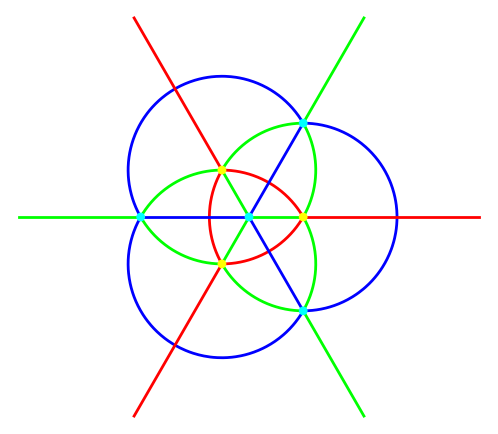

In [50]:
P_rgb_curves = Graphics()

# the 2-interations
for (wi, wj) in [(-w1,-w2), (-w1,-w3), (-w2,-w3), (-w1,w4), (-w2,w4),(-w3,w4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    two_curve = vector(stereographic_proj(three_curve)).simplify()
    # RED: 0 to pi/2
    if wj != w4:
        P_rgb_curves += parametric_plot(two_curve,
                             (t,0,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
    else:
        P_rgb_curves += parametric_plot(two_curve,
                             (t,0,red_bound), #(t,0,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
    # GREEN: pi/2 to pi
    if wj != w4:
        P_rgb_curves += parametric_plot(two_curve,
                             (t,pi/2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    else:
        P_rgb_curves += parametric_plot(two_curve,
                             (t,green_bound, pi), #(t,pi/2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    # BLUE: pi to 3*pi/2
    P_rgb_curves += parametric_plot(two_curve,
                         (t,pi,3*pi/2),
                         thickness=2,
                         color=rainbow(3)[2])
    # GREEN: 3*pi/2 to pi
    P_rgb_curves += parametric_plot(two_curve,
                             (t,3*pi/2,2*pi),
                             thickness=2,
                             color=rainbow(3)[1])

P_rgb_curves += P_points
    
P_rgb_curves.show(aspect_ratio=1,axes=False,figsize=6)

P_rgb_curves.save('rgb_curves.pdf', aspect_ratio=1, axes=False, figsize=12)

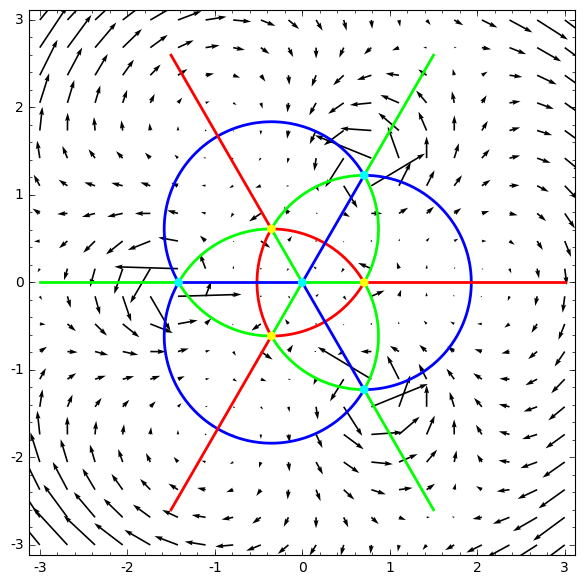

In [25]:
# plot at medium scale
P_rgb_curves + plot_vector_field(connection, (x,-3,3), (y,-3,3), aspect_ratio=1, axes=False)

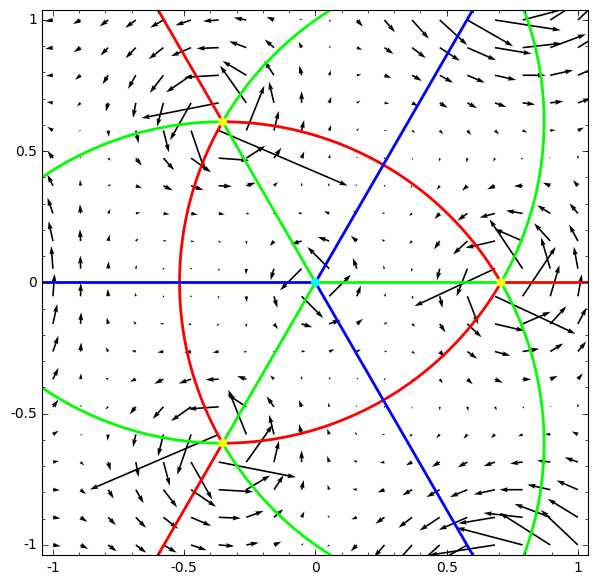

In [26]:
# plot at smaller scale around 0
P_rgb_curves + \
plot_vector_field(connection, 
                  (x,-1,1), (y,-1,1),
                  aspect_ratio=1, xmax=1, xmin=-1, ymax=1, ymin=-1, axes=False)

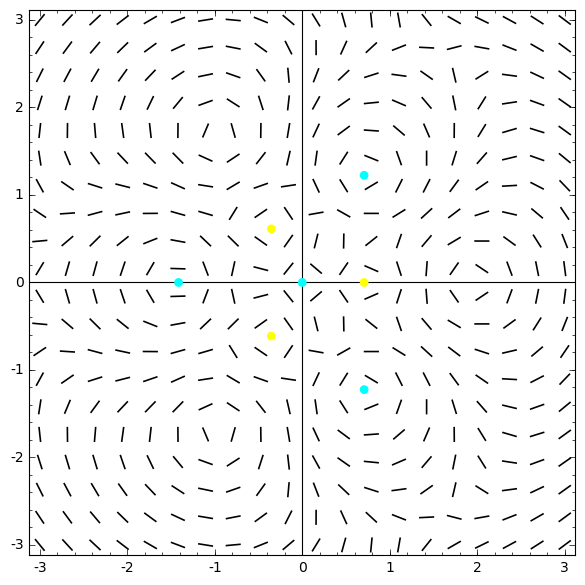

In [27]:
P_points+plot_slope_field( connection[1]/connection[0], (x,-3,3), (y,-3,3), aspect_ratio=1)

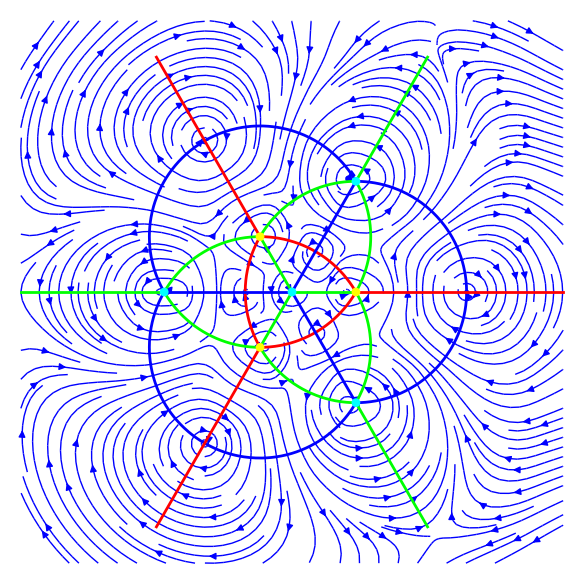

In [46]:
P_total_flow = P_rgb_curves + \
        streamline_plot((connection[0],connection[1]),
                        (x,-3,3), (y,-3,3),
                        density=2, aspect_ratio=1, axes=False, frame=False)
P_total_flow.show()
P_total_flow.save('rbg_total_flow.pdf')

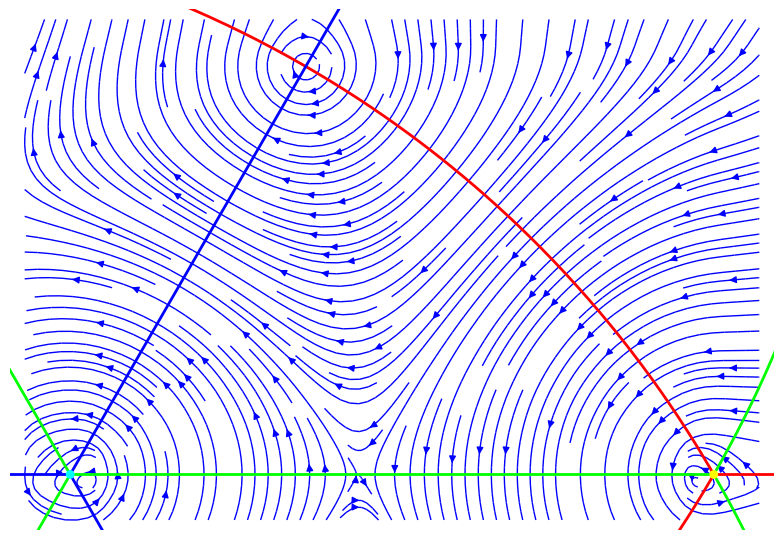

In [47]:
P_fund_domain_flow = P_rgb_curves + \
        streamline_plot((connection[0],connection[1]),
                        (x,-0.05,1/sqrt(2)+0.05), (y,-0.05,0.5),
                        xmin=-0.05, ymin=-0.05,
                        xmax=1/sqrt(2)+0.05, ymax=0.5,
                        density=2, aspect_ratio=1, axes=False, frame=False)
P_fund_domain_flow.show()
P_fund_domain_flow.save('rbg_fund_domain_flow.pdf')

In [36]:
Fs = [ diff(vf[1],x) - diff(vf[0],y) for vf  in vfs ]

# by symmetry, we know that, if F_4 == 0, then so do F_1,F_2, and F_3. 
# however, the algebra (in this representation) seems to be too much for sage.

F_conn = sum(Fs)

In [37]:
# don't run this! each of the simplify and the mathjax are too much!
# pretty_print(F_conn.simplify_full())

# I'm kind of confused by this plot, it should be roughly 4 dirac-deltas. Or maybe a plot of zero.
# (where you can't see the deltas) I see 3 of them, corresponding to the 3 points away from the origin.
# Is this just an algebraic cancellation issue?
#P = plot3d( F_conn , (x,-3,3), (y,-3,3))
#P.show(viewer='threejs')

In [38]:
from sage.plot.colors import chocolate
P_sphere = implicit_plot3d( x^2+y^2+z^2 ==1, 
                            (x,-1.1,1.1),
                            (y,-1.1,1.1),
                            (z,-1.1,1.1),
                            color=chocolate,
                            opacity=0.7)

In [49]:
P_3d_curves = Graphics()

# the 2-interations
for (wi, wj) in [(-w1,-w2), (-w1,-w3), (-w2,-w3), (-w1,w4), (-w2,w4),(-w3,w4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    # RED: 0 to pi/2
    P_3d_curves += parametric_plot(three_curve,
                             (t,0,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
    # GREEN: pi/2 to pi
    P_3d_curves += parametric_plot(three_curve,
                             (t,pi/2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    # BLUE: pi to 3*pi/2
    P_3d_curves += parametric_plot(three_curve,
                         (t,pi,3*pi/2),
                         thickness=2,
                         color=rainbow(3)[2])
    # GREEN: 3*pi/2 to pi
    P_3d_curves += parametric_plot(three_curve,
                             (t,3*pi/2,2*pi),
                             thickness=2,
                             color=rainbow(3)[1])

#P_3d_curves.show(aspect_ratio=1,frame=False,viewer='threejs')

In [42]:
# differential of inverse stereographic projection
dISP = matrix([[4*x,4*y],[2*(-x^2+y^2+1),-4*x*y],[-4*x*y,2*(x^2-y^2+1)]])/(x^2+y^2+1)^2

epsilon = 0.001
delta = 0.1
max_len = 0.1

graphics_objects = []

for theta in srange(0+epsilon,N(pi-epsilon),delta):
    n = max(1, 2*pi*sin(theta)/delta)
    for phi in srange(0,N(2*pi),N(2*pi/n)):
        pt3d = vector((cos(theta), sin(theta)*cos(phi), sin(theta)*sin(phi) ))
        #graphics_objects.append(point3d( pt3d , color='black'))
        pt2d = stereographic_proj(pt3d)
        vec2d = connection(x=pt2d[0],y=pt2d[1])
        vec3d = dISP(x=pt2d[0],y=pt2d[1]) * vec2d
        norm = N(vec3d.norm())
        if norm > max_len:
            vec3d = max_len*vec3d/norm
        graphics_objects.append( arrow(pt3d, pt3d+vec3d, color='black', arrowsize=1) )


In [43]:
P_3d_vf = P_3d_curves + P_sphere + sum(graphics_objects)

In [44]:
P_3d_vf.show(viewer='threejs', frame=False)

Graphics3d Object

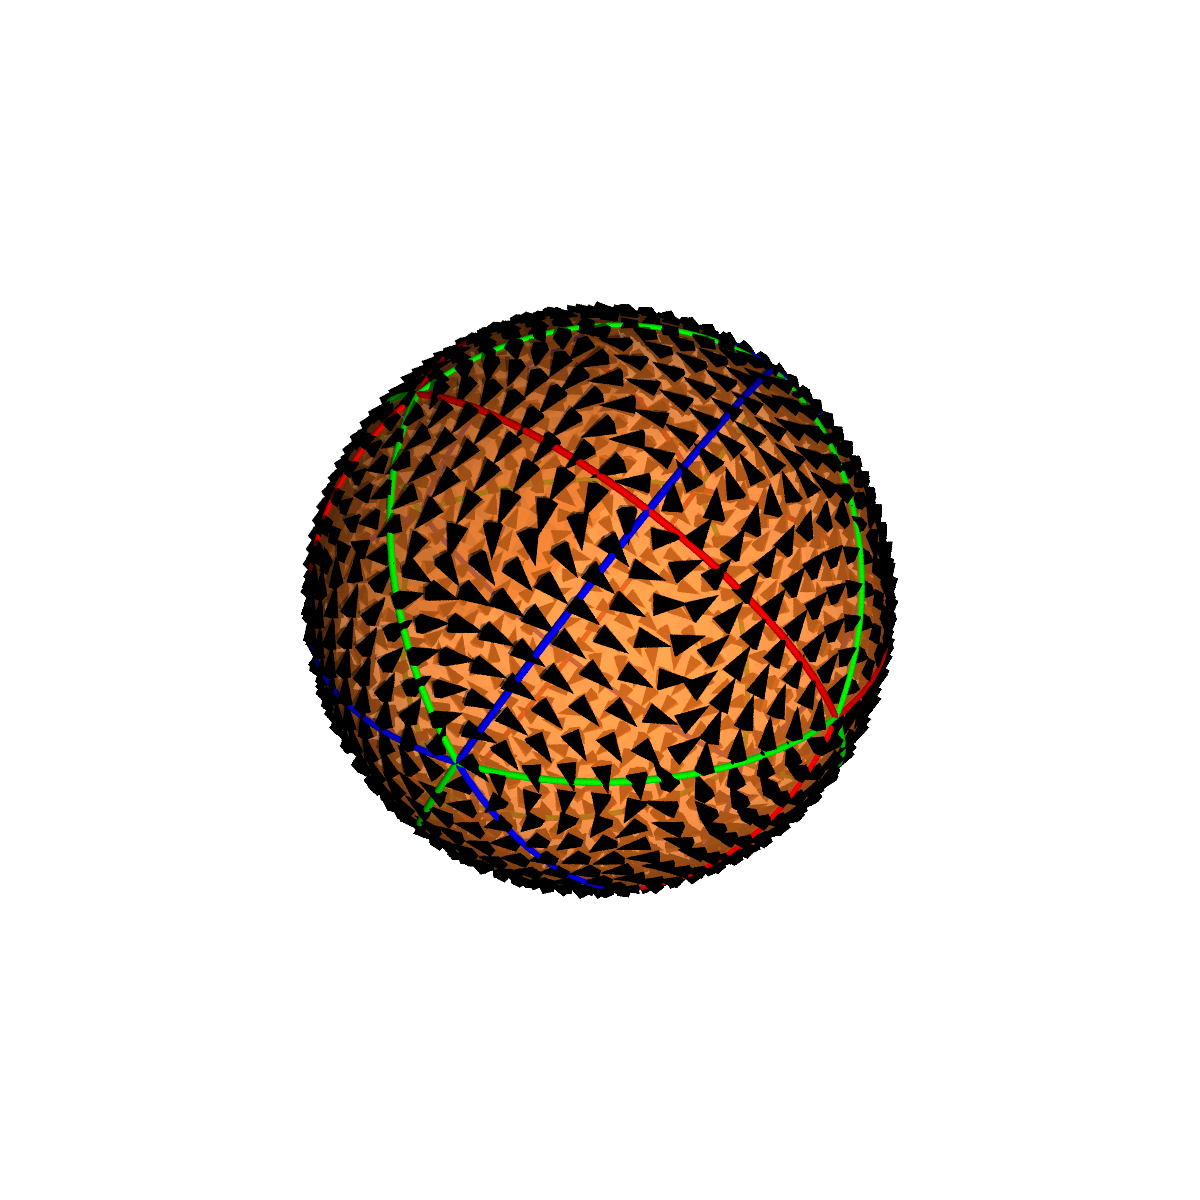

In [45]:
P_3d_vf.show(viewer='tachyon', frame=False, figsize=12)

In [48]:
P_3d_vf.save('rbg_sphere_flow.png',viewer='tachyon', frame=False, figsize=12)